# Exercise 1 - 3D - 2D

In [2]:
import numpy as np
import cv2 as cv2
from numpy.linalg import inv, pinv
import matplotlib.pyplot as plt

Recall from the slides the steps from Algorithm 3:

![title](algorithm_3.png)

![title](PnP.png)



[-15.06803463  -1.80452783  64.14534081]
[-15.06459979  -1.80846341  64.14553123]
[-15.58287197  -1.88553772  66.33109744]
[-16.19682257  -1.94765888  68.80983062]
[-15.88176858  -1.89802861  67.57254925]
[438.33023 165.02931]
[438.33023 165.02931]
[439.05133 166.85335]
[440.34595 167.48695]
[441.6861  168.38446]


FileNotFoundError: [Errno 2] No such file or directory: 'reference_2D_5.npy'

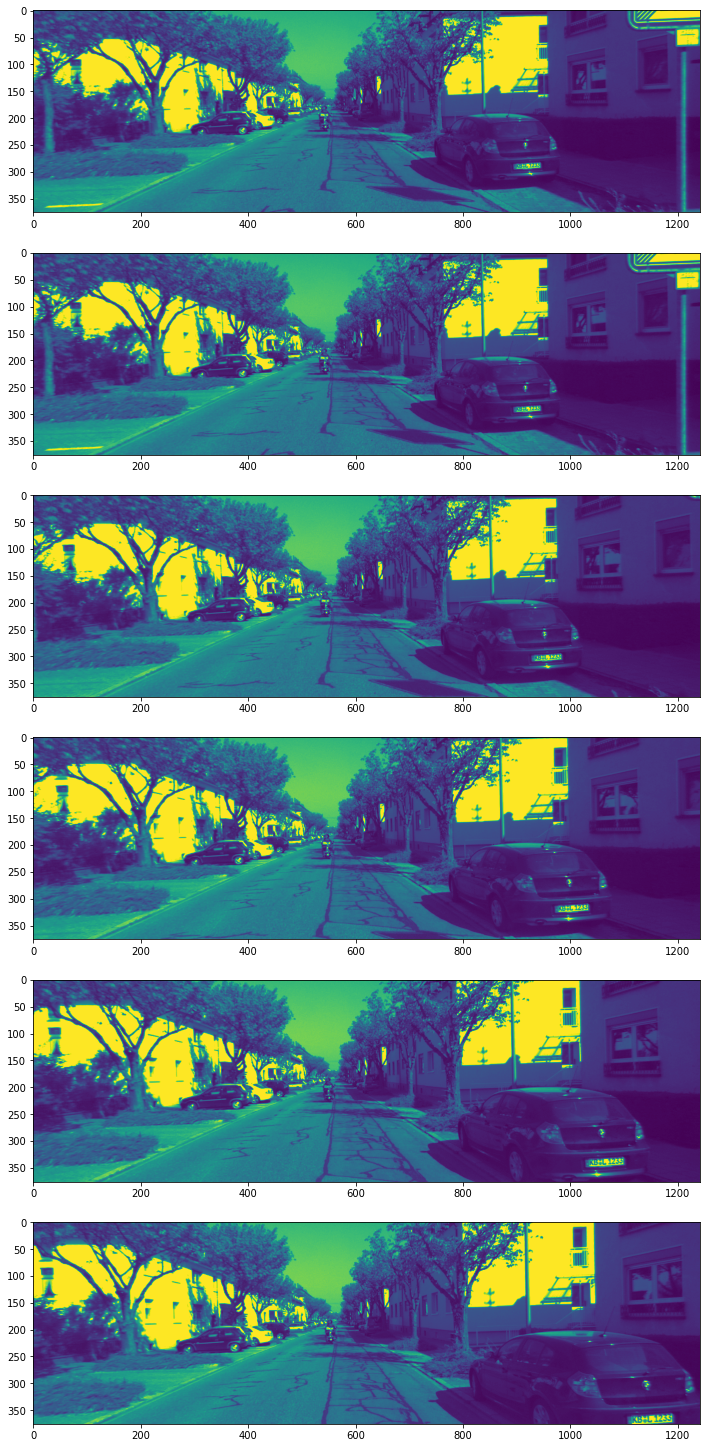

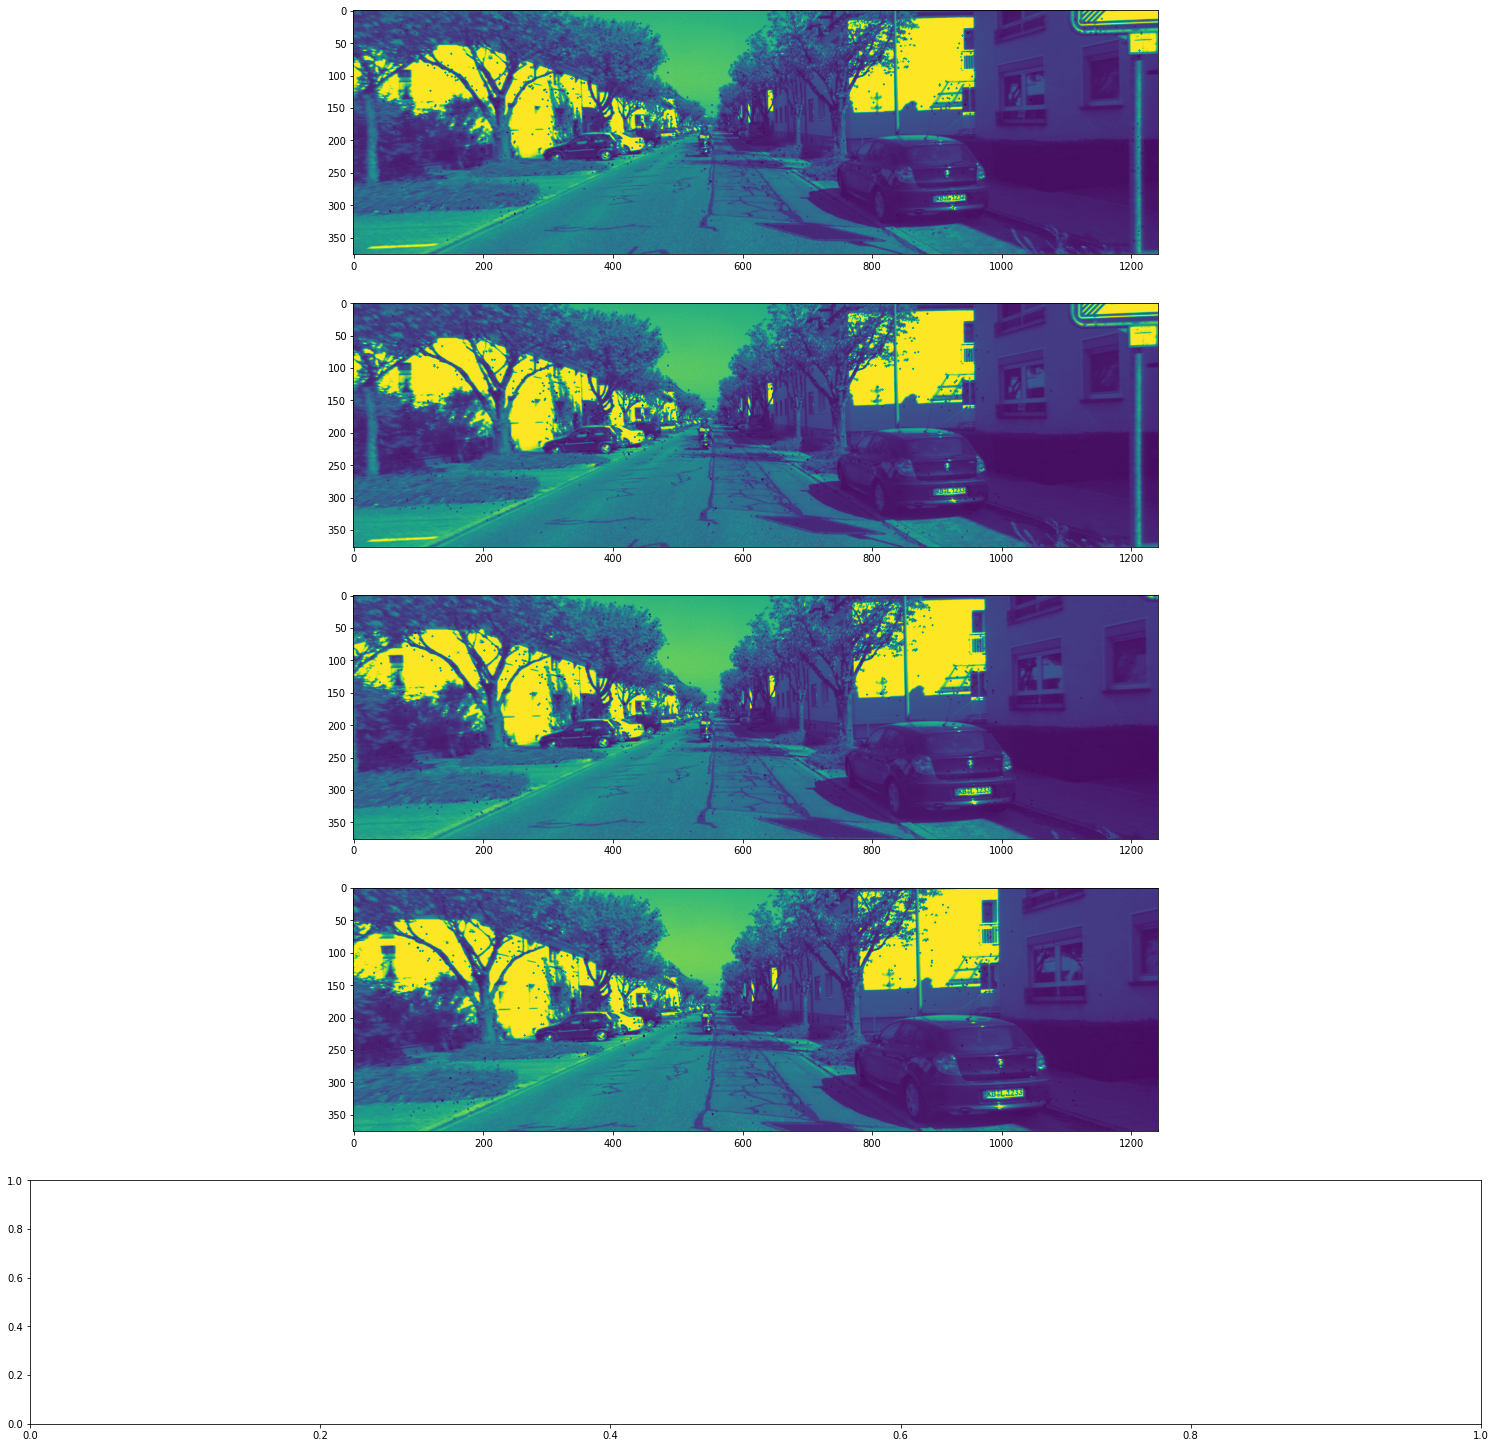

In [3]:
# LOAD IMAGES
fig, ax = plt.subplots(nrows=6, ncols=1, figsize=(26,26))
for i in [0,1,2,3,4,5]:
    img = np.load("img_" + str(i) + ".npy")
    ax[i].imshow(img)

# LOAD LANMARKS
for i in [0,1,2,3,4]:
    landmark = np.load("landmark_3D_" + str(i) + ".npy")
    print(landmark[0])

# LOAD REFERENCE
for i in [0,1,2,3,4]:
    landmark = np.load("reference_2D_" + str(i) + ".npy")
    print(landmark[0])

fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(26,26))
# PLOT POINTS
for i in [0,1,2,3,4]:
    landmark = np.load("reference_2D_" + str(i+1) + ".npy")
    img = np.load("img_" + str(i) + ".npy")
    for item in landmark:
        item = [int(item[0]), int(item[1])]
        img_with_landmark = cv2.circle(img,item,1,(0,0,255))
    ax[i].imshow(img)

# Store the features in 'reference_2D' and the 3D points (landmarks) in 'landmark_3D'

# STEPS

Do only once:
* 1.1) Capture two frames $I_{k-2}, I_{k-1}$
* 1.2) Extract and match features between them
* 1.3) Triangulate features from $I_{k-2}, I_{k-1}$


Do at each iteration:
* 2.1) Capture new frame $I_{k}$
* 2.2) Extract features and match with previous frame $I_{k-1}$
* 2.3) Compute camera pose (PnP) from 3-D-to-2-D matches
* 2.4) Triangulate all new feature matches between $I_{k}$ and $I_{k-1}$
* 2.5) Iterate from 2.1).

# MY NOTES
* 1.1) img0 and img1 is same `print(img0==img1).any()) `
* 1.2) 
* 1.3) Triangulation: Finding the position of a distant object B with the angles observed from points A and C and the baseline b between them

# Exercise 1a)
The steps 1)-2.1) has already been done, and is saved in corresponding files. The exercise is to implement step 2.2) by filling in the missing code below

In [ ]:
def featureTracking(prev_img, next_img, prev_points, world_points):
    """
    Use OpenCV to find the prev_points from the prev_img in the next_img
    Remember to remove points that could not be found from prev_points, next_points, and world_points
    hint: status == 1
    """
    params = dict(winSize=(21, 21),
                 maxLevel=3,
                 criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 30, 0.01))
    
    #next_points, status, _ = ...

    return world_points, prev_points, next_points

Hint: Exercise 4 in week 2

# Exercise 1b)
Continue the algorithm by implementing step 2.3)

FileNotFoundError: [Errno 2] No such file or directory: 'landmark_0.npy'

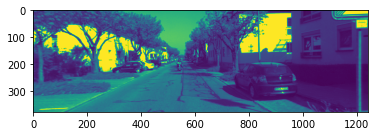

In [ ]:
K = np.array([[7.188560e+02, 0.000000e+00, 6.071928e+02], # camera matrix
              [0, 7.188560e+02, 1.852157e+02],
              [0, 0, 1]])

reference_img = np.load("img_" + str(0) + ".npy") #updated in the end of each cycle
plt.imshow(reference_img)

for t in range(1, 6):

    # the image at current time=t
    curImage = np.load("img_" + str(t) + ".npy")
    # the 3D landmarks in the world coordinates which have been computed in time=t-1
    landmark_3D = np.load("landmark_" + str(t-1) + ".npy")
    # the 2D coordinates of the 3D points in the previous frame at time=t-1
    reference_2D = np.load("reference_2D_" + str(t-1) + ".npy")
    
    # the 2D landmarks at the current time = t
    landmark_3D, reference_2D, tracked_2Dpoints = featureTracking(reference_img, 
                                                                  curImage, 
                                                                  reference_2D,
                                                                  landmark_3D)
    
    """
    Using OpenCV, implement PnP using Ransac
    """
    #_, rvec, tvec, inliers = ...


    """
    Transform the translation and rotation into the world frame
    """
    
    
    print(tvec[0], tvec[1], tvec[2], rvec[0], rvec[1], rvec[2])

    # update for next timestep
    reference_img = curImage

Hint: The output should look similar to:

[-0.00110282] [-0.00067164] [-0.00078343] [-7.40069212e-05] [-7.35119065e-05] [9.84544279e-05]

[-0.00363946] [-0.00875075] [0.67580842] [-0.0021666] [0.00325853] [-0.00244333]

[-0.01096271] [-0.01635663] [1.3774094] [-0.00364615] [0.0075151] [-0.00099691]

[-0.0315663] [-0.02560111] [2.0996797] [-0.00509583] [0.01121646] [-0.00082978]

[-0.04971858] [-0.03532535] [2.8330071] [-0.00561424] [0.0161333] [0.00041981]

# Exercise 1c)
What approximate direction did the camera move in?